# Vectorization with SciKit Learn

DS 5001 Text as Data

# Set Up

In [1]:
import configparser
config = configparser.ConfigParser()
config.read("../../../env.ini")
data_hone = config['DEFAULT']['data_home']
output_dir = config['DEFAULT']['output_dir']
local_lib = config['DEFAULT']['local_lib']

In [2]:
data_prefix = 'austen-melville'
OHCO = ['book_id','chap_id','para_num','sent_num','token_num']
colors = 'YlGnBu'

In [3]:
ngram_range = (1,2)
n_terms = 4000

In [173]:
import pandas as pd
import numpy as np
import seaborn as sns; sns.set()
import plotly_express as px

In [5]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer

# Import CORPUS

In [6]:
LIB = pd.read_csv(f"{output_dir}/{data_prefix}-LIB.csv").rename(columns={'book':'book_id'}).set_index(OHCO[:1])

In [7]:
CORPUS = pd.read_csv(f"{output_dir}/{data_prefix}-CORPUS.csv").set_index(OHCO)

In [8]:
CORPUS.head()

pos_tuple  pos  \
book_id chap_id para_num sent_num token_num                             
105     1       1        0        0               ('Sir', 'NNP')  NNP   
                                  1            ('Walter', 'NNP')  NNP   
                                  2           ('Elliot,', 'NNP')  NNP   
                                  3                 ('of', 'IN')   IN   
                                  4          ('Kellynch', 'NNP')  NNP   

                                            token_str  term_str pos_group  
book_id chap_id para_num sent_num token_num                                
105     1       1        0        0               Sir       sir        NN  
                                  1            Walter    walter        NN  
                                  2           Elliot,    elliot        NN  
                                  3                of        of        IN  
                                  4          Kellynch  kellynch        NN

# Create DOC

In [9]:
def gather_docs(CORPUS, ohco_level, term_col='term_str'):
    OHCO = CORPUS.index.names
    CORPUS[term_col] = CORPUS[term_col].astype('str')
    DOC = CORPUS.groupby(OHCO[:ohco_level])[term_col].apply(lambda x:' '.join(x)).to_frame('doc_str')
    return DOC

In [10]:
DOC = gather_docs(CORPUS, 2)

In [11]:
DOC['n_tokens'] = DOC.doc_str.apply(lambda x: len(x.split()))

In [12]:
DOC

doc_str  n_tokens
book_id chap_id                                                             
105     1        sir walter elliot of kellynch hall in somerset...      2625
        2        mr shepherd a civil cautious lawyer who whatev...      1974
        3        i must take leave to observe sir walter said m...      2838
        4        he was not mr wentworth the former curate of m...      1805
        5        on the morning appointed for admiral and mrs c...      3322
...                                                            ...       ...
34970   110      in the midst of all these mental confusions th...       658
        111      gaining the apostles and leaving his two compa...      1084
        112      pierre passed on to a remote quarter of the bu...       659
        113      that sundown pierre stood solitary in a low du...       380
        114      at night the squat framed asthmatic turnkey tr...       645

[1185 rows x 2 columns]

# Method 1: CountVectorizer + TfidfTransformer

## Create DTM

In [13]:
count_engine = CountVectorizer(
    stop_words = 'english',
    ngram_range = ngram_range,
    max_features = n_terms)

In [14]:
X = count_engine.fit_transform(DOC.doc_str)

In [15]:
X.toarray()

array([[0, 0, 1, ..., 1, 3, 1],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 2, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [16]:
DTM = pd.DataFrame(X.toarray(), 
    columns=count_engine.get_feature_names_out(), 
    index=DOC.index)

In [17]:
DTM

abandoned  abbey  able  aboard  abode  abrazza  abroad  \
book_id chap_id                                                           
105     1                0      0     1       0      0        0       1   
        2                0      0     1       0      1        0       0   
        3                0      0     0       0      0        0       2   
        4                0      0     0       0      0        0       0   
        5                0      0     2       0      0        0       1   
...                    ...    ...   ...     ...    ...      ...     ...   
34970   110              1      0     0       0      0        0       0   
        111              0      0     0       0      0        0       0   
        112              0      0     0       0      0        0       0   
        113              0      0     0       0      0        0       0   
        114              0      0     0       0      0        0       0   

                 abruptly  absence  absent  ...  young ladies  young lady  \
book_id chap_id                             ...                             
105     1               0        0       0  ...             0           0   
        2               0        0       0  ...             0           0   
        3               0        0       0  ...             0           0   
        4               0        0       0  ...             0           0   
        5               0        2       0  ...             2           0   
...                   ...      ...     ...  ...           ...         ...   
34970   110             0        0       0  ...             0           0   
        111             0        1       0  ...             0           0   
        112             1        0       0  ...             0           0   
        113             0        0       0  ...             0           0   
        114             0        0       0  ...             0           1   

                 young man  young men  young people  young woman  younger  \
book_id chap_id                                                             
105     1                2          0             0            0        1   
        2                0          0             0            1        0   
        3                0          0             0            0        0   
        4                3          0             0            0        1   
        5                0          0             1            0        0   
...                    ...        ...           ...          ...      ...   
34970   110              0          0             0            0        0   
        111              0          0             0            0        0   
        112              0          0             0            0        0   
        113              0          0             0            0        0   
        114              0          0             0            0        0   

                 youngest  youth  youthful  
book_id chap_id                             
105     1               1      3         1  
        2               0      0         0  
        3               0      2         0  
        4               0      3         0  
        5               0      0         0  
...                   ...    ...       ...  
34970   110             0      0         0  
        111             0      0         0  
        112             0      0         0  
        113             0      0         0  
        114             0      0         0  

[1185 rows x 4000 columns]

## Get VOCAB

In [68]:
VOCAB = DTM.sum().to_frame('n')
VOCAB.index.name = 'term_str'

In [72]:
VOCAB['df'] = DTM.astype(bool).sum()
VOCAB['dfidf'] = VOCAB.df * np.log2(len(DTM)/VOCAB.df)

In [132]:
# VOCAB['dp'] = VOCAB.df / VOCAB.df.sum()
VOCAB['dp'] = VOCAB.df / len(DTM)
VOCAB['di'] = np.log2(1/VOCAB.dp)
VOCAB['dh'] = VOCAB.dp * VOCAB.di

In [133]:
VOCAB['n_chars'] = VOCAB.apply(lambda x: len(x.name), 1)
VOCAB['n_tokens'] = VOCAB.apply(lambda x: len(x.name.split()), 1)

In [134]:
VOCAB.sort_index()

,n,df,dfidf,dp,di,dh,n_chars,n_tokens
term_str,,,,,,,,
abandoned,72,54,240.612327,0.045570,4.455784,0.203048,9,1
abbey,84,37,185.045065,0.031224,5.001218,0.156156,5,1
able,414,259,568.210532,0.218565,2.193863,0.479503,4,1
aboard,125,79,308.644357,0.066667,3.906891,0.260459,6,1
abode,57,50,228.340758,0.042194,4.566815,0.192693,5,1
...,...,...,...,...,...,...,...,...
young woman,70,54,240.612327,0.045570,4.455784,0.203048,11,2
younger,86,68,280.378178,0.057384,4.123209,0.236606,7,1
youngest,43,32,166.741483,0.027004,5.210671,0.140710,8,1


In [135]:
VOCAB.value_counts('n_tokens')

n_tokens
1    3818
2     182
Name: count, dtype: int64

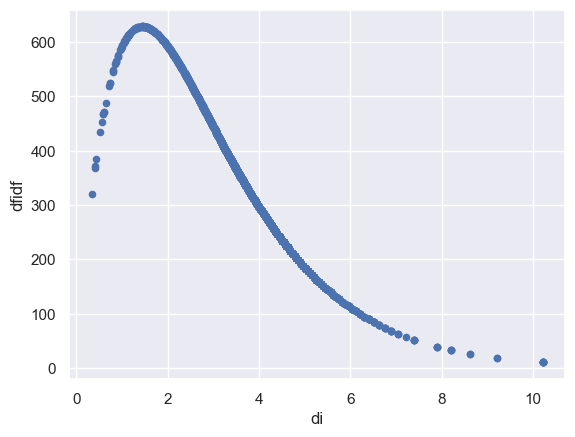

In [136]:
VOCAB.plot.scatter('di','dfidf');

In [137]:
VOCAB.loc[(VOCAB.n_tokens == 2) & (VOCAB.dfidf > 399)].sort_values('dh', ascending=False).head(20)

,n,df,dfidf,dp,di,dh,n_chars,n_tokens
term_str,,,,,,,,
young man,301,167,472.103498,0.140928,2.826967,0.398400,9,2
great deal,249,165,469.317606,0.139241,2.844349,0.396049,10,2
old man,307,150,447.277898,0.126582,2.981853,0.377450,7,2
dare say,224,143,436.264401,0.120675,3.050800,0.368156,8,2


In [1]:
# DTM

# Explore bigrams

In [157]:
def compare_term_dist(my_term_str):
    DTM.loc[DTM[my_term_str] > 0, [my_term_str]]\
        .join(LIB.author, on='book_id', rsuffix='_lib')\
        .groupby(['author']).count().plot.barh(figsize=(3,2))

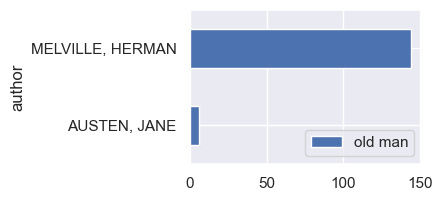

In [158]:
compare_term_dist('old man')

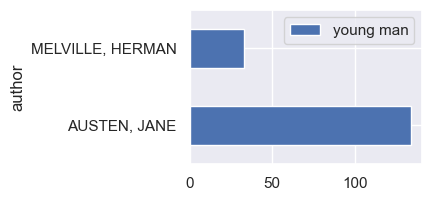

In [159]:
compare_term_dist('young man')

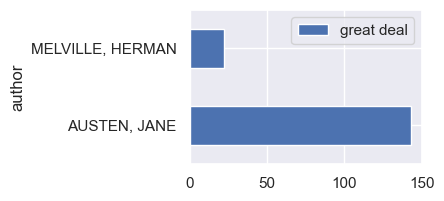

In [160]:
compare_term_dist('great deal')

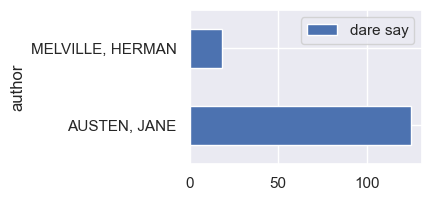

In [161]:
compare_term_dist('dare say')

## Create TFIDF

In [162]:
tfidf_engine = TfidfTransformer(norm='l2', use_idf=True)

In [163]:
X1 = tfidf_engine.fit_transform(DTM)

In [164]:
TFIDF = pd.DataFrame(X1.toarray(), columns=DTM.columns, index=DTM.index)

In [165]:
TFIDF

term_str         abandoned  abbey      able  aboard     abode  abrazza  \
book_id chap_id                                                          
105     1          0.00000    0.0  0.012081     0.0  0.000000      0.0   
        2          0.00000    0.0  0.013690     0.0  0.022548      0.0   
        3          0.00000    0.0  0.000000     0.0  0.000000      0.0   
        4          0.00000    0.0  0.000000     0.0  0.000000      0.0   
        5          0.00000    0.0  0.023687     0.0  0.000000      0.0   
...                    ...    ...       ...     ...       ...      ...   
34970   110        0.05511    0.0  0.000000     0.0  0.000000      0.0   
        111        0.00000    0.0  0.000000     0.0  0.000000      0.0   
        112        0.00000    0.0  0.000000     0.0  0.000000      0.0   
        113        0.00000    0.0  0.000000     0.0  0.000000      0.0   
        114        0.00000    0.0  0.000000     0.0  0.000000      0.0   

term_str           abroad  abruptly   absence  absent  ...  young ladies  \
book_id chap_id                                        ...                 
105     1        0.016386  0.000000  0.000000     0.0  ...      0.000000   
        2        0.000000  0.000000  0.000000     0.0  ...      0.000000   
        3        0.028743  0.000000  0.000000     0.0  ...      0.000000   
        4        0.000000  0.000000  0.000000     0.0  ...      0.000000   
        5        0.016064  0.000000  0.029646     0.0  ...      0.034317   
...                   ...       ...       ...     ...  ...           ...   
34970   110      0.000000  0.000000  0.000000     0.0  ...      0.000000   
        111      0.000000  0.000000  0.041972     0.0  ...      0.000000   
        112      0.000000  0.080842  0.000000     0.0  ...      0.000000   
        113      0.000000  0.000000  0.000000     0.0  ...      0.000000   
        114      0.000000  0.000000  0.000000     0.0  ...      0.000000   

term_str         young lady  young man  young men  young people  young woman  \
book_id chap_id                                                                
105     1          0.000000   0.028353        0.0      0.000000     0.000000   
        2          0.000000   0.000000        0.0      0.000000     0.022137   
        3          0.000000   0.000000        0.0      0.000000     0.000000   
        4          0.000000   0.070508        0.0      0.000000     0.000000   
        5          0.000000   0.000000        0.0      0.019599     0.000000   
...                     ...        ...        ...           ...          ...   
34970   110        0.000000   0.000000        0.0      0.000000     0.000000   
        111        0.000000   0.000000        0.0      0.000000     0.000000   
        112        0.000000   0.000000        0.0      0.000000     0.000000   
        113        0.000000   0.000000        0.0      0.000000     0.000000   
        114        0.060621   0.000000        0.0      0.000000     0.000000   

term_str          younger  youngest     youth  youthful  
book_id chap_id                                          
105     1        0.018447  0.021986  0.043505  0.020188  
        2        0.000000  0.000000  0.000000  0.000000  
        3        0.000000  0.000000  0.025437  0.000000  
        4        0.030582  0.000000  0.072124  0.000000  
        5        0.000000  0.000000  0.000000  0.000000  
...                   ...       ...       ...       ...  
34970   110      0.000000  0.000000  0.000000  0.000000  
        111      0.000000  0.000000  0.000000  0.000000  
        112      0.000000  0.000000  0.000000  0.000000  
        113      0.000000  0.000000  0.000000  0.000000  
        114      0.000000  0.000000  0.000000  0.000000  

[1185 rows x 4000 columns]

## Add stats to VOCAB

In [168]:
VOCAB['tfidf_mean'] = TFIDF.mean()

In [169]:
VOCAB.sort_values('dfidf', ascending=False).head(10)

,n,df,dfidf,dp,di,dh,n_chars,n_tokens,tfidf_mean
term_str,,,,,,,,,
home,954,437,628.922479,0.368776,1.439182,0.530736,4,1,0.011150
cried,1232,438,628.917316,0.369620,1.435884,0.530732,5,1,0.014962
certain,707,433,628.910040,0.365401,1.452448,0.530726,7,1,0.009779
looking,880,429,628.844290,0.362025,1.465838,0.530670,7,1,0.010443
manner,748,427,628.791269,0.360338,1.472579,0.530626,6,1,0.008853
general,831,427,628.791269,0.360338,1.472579,0.530626,7,1,0.010138
felt,1000,427,628.791269,0.360338,1.472579,0.530626,4,1,0.011270
set,717,445,628.789369,0.375527,1.413010,0.530624,3,1,0.009067
times,737,447,628.723524,0.377215,1.406540,0.530568,5,1,0.010159


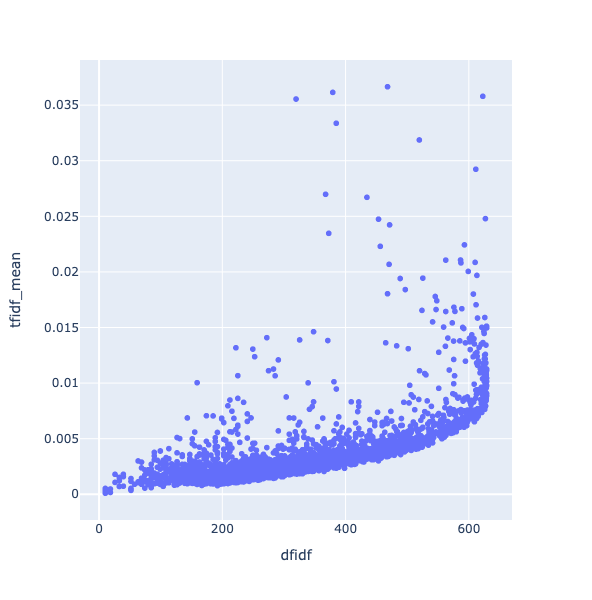

In [177]:
px.scatter(VOCAB.reset_index(), 'dfidf', 'tfidf_mean', hover_name='term_str', height=600, width=700)

# Method 2: TfidfVectorizer

This method combines the two.

## Create TFIDF

In [179]:
tfidf_engine2 = TfidfVectorizer(
    stop_words = 'english',
    ngram_range = ngram_range,
    max_features = n_terms,
    norm = 'l2', 
    use_idf = True)

In [180]:
X2 = tfidf_engine2.fit_transform(DOC.doc_str)

In [181]:
TFIDF2 = pd.DataFrame(X2.toarray(), columns=tfidf_engine2.get_feature_names_out(), index=DTM.index)

In [182]:
TFIDF2

abandoned  abbey      able  aboard     abode  abrazza  \
book_id chap_id                                                          
105     1          0.00000    0.0  0.012081     0.0  0.000000      0.0   
        2          0.00000    0.0  0.013690     0.0  0.022548      0.0   
        3          0.00000    0.0  0.000000     0.0  0.000000      0.0   
        4          0.00000    0.0  0.000000     0.0  0.000000      0.0   
        5          0.00000    0.0  0.023687     0.0  0.000000      0.0   
...                    ...    ...       ...     ...       ...      ...   
34970   110        0.05511    0.0  0.000000     0.0  0.000000      0.0   
        111        0.00000    0.0  0.000000     0.0  0.000000      0.0   
        112        0.00000    0.0  0.000000     0.0  0.000000      0.0   
        113        0.00000    0.0  0.000000     0.0  0.000000      0.0   
        114        0.00000    0.0  0.000000     0.0  0.000000      0.0   

                   abroad  abruptly   absence  absent  ...  young ladies  \
book_id chap_id                                        ...                 
105     1        0.016386  0.000000  0.000000     0.0  ...      0.000000   
        2        0.000000  0.000000  0.000000     0.0  ...      0.000000   
        3        0.028743  0.000000  0.000000     0.0  ...      0.000000   
        4        0.000000  0.000000  0.000000     0.0  ...      0.000000   
        5        0.016064  0.000000  0.029646     0.0  ...      0.034317   
...                   ...       ...       ...     ...  ...           ...   
34970   110      0.000000  0.000000  0.000000     0.0  ...      0.000000   
        111      0.000000  0.000000  0.041972     0.0  ...      0.000000   
        112      0.000000  0.080842  0.000000     0.0  ...      0.000000   
        113      0.000000  0.000000  0.000000     0.0  ...      0.000000   
        114      0.000000  0.000000  0.000000     0.0  ...      0.000000   

                 young lady  young man  young men  young people  young woman  \
book_id chap_id                                                                
105     1          0.000000   0.028353        0.0      0.000000     0.000000   
        2          0.000000   0.000000        0.0      0.000000     0.022137   
        3          0.000000   0.000000        0.0      0.000000     0.000000   
        4          0.000000   0.070508        0.0      0.000000     0.000000   
        5          0.000000   0.000000        0.0      0.019599     0.000000   
...                     ...        ...        ...           ...          ...   
34970   110        0.000000   0.000000        0.0      0.000000     0.000000   
        111        0.000000   0.000000        0.0      0.000000     0.000000   
        112        0.000000   0.000000        0.0      0.000000     0.000000   
        113        0.000000   0.000000        0.0      0.000000     0.000000   
        114        0.060621   0.000000        0.0      0.000000     0.000000   

                  younger  youngest     youth  youthful  
book_id chap_id                                          
105     1        0.018447  0.021986  0.043505  0.020188  
        2        0.000000  0.000000  0.000000  0.000000  
        3        0.000000  0.000000  0.025437  0.000000  
        4        0.030582  0.000000  0.072124  0.000000  
        5        0.000000  0.000000  0.000000  0.000000  
...                   ...       ...       ...       ...  
34970   110      0.000000  0.000000  0.000000  0.000000  
        111      0.000000  0.000000  0.000000  0.000000  
        112      0.000000  0.000000  0.000000  0.000000  
        113      0.000000  0.000000  0.000000  0.000000  
        114      0.000000  0.000000  0.000000  0.000000  

[1185 rows x 4000 columns]

# Create BOW

Since SKL created the matrix for us, we need to reverse engineer the BOW.

Here we combine the two matrices.

Note that the long form of the BOW allows us to hold several matrices.

In [185]:
BOW = DTM[DTM > 0].stack().to_frame('tf')\
    .join(TFIDF[TFIDF > 0].stack().to_frame('tfidf'))

In [186]:
BOW.index.names = ['book_id', 'chap_id', 'term_str']

In [187]:
BOW

tf     tfidf
book_id chap_id term_str                   
105     1       able          1.0  0.012081
                abroad        1.0  0.016386
                acknowledged  1.0  0.017983
                acquaintance  4.0  0.051014
                added         2.0  0.022885
...                           ...       ...
34970   114     ye            1.0  0.041773
                yes           2.0  0.067853
                yes yes       1.0  0.068079
                young         2.0  0.056646
                young lady    1.0  0.060621

[387151 rows x 2 columns]

# Compre TF and TP

In [202]:
BOW['tp'] = (DTM.T / DTM.T.sum()).T.stack().to_frame()

In [203]:
BOW

tf     tfidf        tp
book_id chap_id term_str                             
105     1       able          1.0  0.012081  0.001147
                abroad        1.0  0.016386  0.001147
                acknowledged  1.0  0.017983  0.001147
                acquaintance  4.0  0.051014  0.004587
                added         2.0  0.022885  0.002294
...                           ...       ...       ...
34970   114     ye            1.0  0.041773  0.004651
                yes           2.0  0.067853  0.009302
                yes yes       1.0  0.068079  0.004651
                young         2.0  0.056646  0.009302
                young lady    1.0  0.060621  0.004651

[387151 rows x 3 columns]

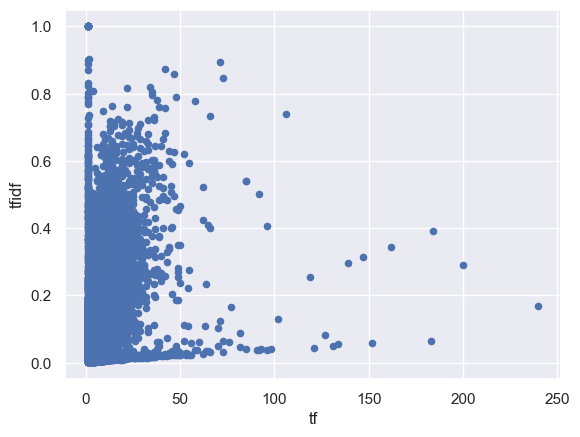

In [198]:
BOW.plot.scatter('tf', 'tfidf');

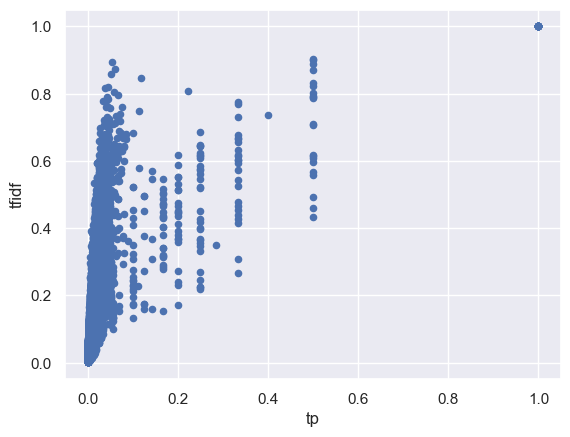

In [197]:
BOW.plot.scatter('tp', 'tfidf');

In [201]:
BOW[BOW.tfidf > .6].value_counts('term_str').head(20)

term_str
pierre          11
harry            6
israel           6
cosmopolitan     5
whale            4
queequeg         3
paul             3
harriet          2
hautia           2
po               2
herb doctor      2
showing          2
nan nan          2
fanny            2
fish             2
jonah            2
acquaintance     2
borabolla        2
ugh              2
vivenza          2
Name: count, dtype: int64